# draft

In [2]:
import numpy as np

In [3]:
from colormap import rgb2hex

In [19]:
mask = np.zeros(shape=[4, 5, 3])

In [20]:
mask[2,4, :] = 1
mask[3,4, :] = 2

mask

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [2., 2., 2.]]])

In [30]:
mask_hex = np.apply_along_axis(lambda x : rgb2hex(x[0], x[1], x[2]), axis=-1, arr = mask.astype(np.int64) )  
# instances are encoded as different colors
obj_ids = np.unique(mask_hex)



In [31]:
obj_ids

array(['#000000', '#010101', '#020202'], dtype='<U7')

In [29]:
obj_ids[:, None, None]

array([[['#010101']],

       [['#020202']]], dtype='<U7')

In [28]:
obj_ids[None]

array([['#010101', '#020202']], dtype='<U7')

In [32]:
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# generate as puch masks as objects cf notebook
masks = mask_hex != '#000000'

In [33]:
masks

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False,  True],
       [False, False, False, False,  True]])

In [62]:
a = np.zeros(shape=[4, 5]).astype(bool)

In [63]:
a

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [66]:
(a == False).all()

False

In [65]:
a[3, 2] = True

In [49]:
a

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False,  True, False, False]])

In [42]:
np.where(a)

(array([3]), array([2]))

In [1]:
import torch

In [5]:
e = torch.tensor([[4, 5]])

In [6]:
e.dim()

2

# Removing pictures wo/ masks

In [7]:
import sys

sys.path.append('/coding_linux20/encov_torch/nn_training')

In [9]:
from archs.data_load import *
from archs.helper import *
#from src.nn.archs.segmentation import *
from archs.trainer import Trainer

from models.models import *

import references.detection.utils as utils

from src.tools.helper import log_config

In [8]:
from src.nn.archs.data_load import *

In [13]:
from tqdm import tqdm

In [14]:
dataset = EndovisTunedDataset('/data/user/DATA_SSD1/__adri/endovis_tuned/data', get_transform(train=True), train = True, val_frac = .2)
dataset_test = EndovisTunedDataset('/data/user/DATA_SSD1/__adri/endovis_tuned/data', get_transform(train=True), train = False, val_frac = .2)

In [16]:
ann_id = 1
dataset = {"images": [], "categories": [], "annotations": []}
categories = set()

In [20]:
for img_idx in tqdm(range(len(dataset_test))):
        # find better way to get target
        # targets = ds.get_annotations(img_idx)
        img, targets = dataset_test[img_idx]
        image_id = targets["image_id"].item()
        img_dict = {}
        img_dict["id"] = image_id
        img_dict["height"] = img.shape[-2]
        img_dict["width"] = img.shape[-1]
        dataset["images"].append(img_dict)
        bboxes = targets["boxes"].clone()
        bboxes[:, 2:] -= bboxes[:, :2]
        bboxes = bboxes.tolist()
        labels = targets["labels"].tolist()
        areas = targets["area"].tolist()
        iscrowd = targets["iscrowd"].tolist()
        if "masks" in targets:
            masks = targets["masks"]
            if masks.dim() != 3:
                print(img_idx)
            # make masks Fortran contiguous for coco_mask


 76%|███████▌  | 272/360 [00:27<00:11,  7.71it/s]

270
271


 76%|███████▌  | 274/360 [00:27<00:14,  6.12it/s]

272
273


 77%|███████▋  | 276/360 [00:28<00:13,  6.12it/s]

274
275


 77%|███████▋  | 278/360 [00:28<00:14,  5.73it/s]

276
277


 78%|███████▊  | 280/360 [00:28<00:13,  6.01it/s]

278
279


 78%|███████▊  | 282/360 [00:29<00:12,  6.01it/s]

280
281


 79%|███████▉  | 284/360 [00:29<00:13,  5.63it/s]

282
283


 79%|███████▉  | 286/360 [00:29<00:13,  5.49it/s]

284
285


 80%|████████  | 288/360 [00:30<00:13,  5.49it/s]

286
287


 81%|████████  | 290/360 [00:30<00:12,  5.41it/s]

288
289


 81%|████████  | 291/360 [00:30<00:13,  5.18it/s]

290


 81%|████████▏ | 293/360 [00:31<00:13,  5.12it/s]

291
292


 82%|████████▏ | 295/360 [00:31<00:12,  5.27it/s]

293
294


 82%|████████▎ | 297/360 [00:31<00:12,  5.21it/s]

295
296


 83%|████████▎ | 299/360 [00:32<00:11,  5.20it/s]

297
298


 84%|████████▎ | 301/360 [00:32<00:11,  5.35it/s]

299
300


 84%|████████▍ | 302/360 [00:32<00:10,  5.49it/s]

301


 84%|████████▍ | 304/360 [00:33<00:10,  5.49it/s]

302
303


 85%|████████▌ | 306/360 [00:33<00:09,  5.55it/s]

304
305


 86%|████████▌ | 308/360 [00:33<00:09,  5.75it/s]

306
307


 86%|████████▌ | 310/360 [00:34<00:08,  5.70it/s]

308
309


 87%|████████▋ | 312/360 [00:34<00:08,  5.34it/s]

310
311


 87%|████████▋ | 314/360 [00:35<00:08,  5.45it/s]

312
313


 88%|████████▊ | 316/360 [00:35<00:07,  6.05it/s]

314


100%|██████████| 360/360 [00:40<00:00,  8.97it/s]


In [21]:
len(dataset_test)

360

In [22]:
indices = list(range(270))
indices_bis = list(range(315, 361))
idx = indices + indices_bis

In [23]:
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


# display masks

In [3]:
import os
import os.path as osp
import numpy as np
import torch
from PIL import Image
from colormap import rgb2hex

In [4]:
import tqdm

In [5]:

class EndovisDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned

        self.sub_folders = list(sorted(os.listdir(root)))
        self.sub_sub_folder = 'left_frames'
        self.sub_sub_folder_masks = 'ground_truth/TypeSegmentationRescaled'
        self.imgs = []
        self.masks = []
        for sf in self.sub_folders[:-1]:

            list_files = list(sorted(os.listdir(osp.join(root, sf, self.sub_sub_folder))))
            list_path = [osp.join(root, sf, self.sub_sub_folder, file) for file in list_files]

            list_masks = list(sorted(os.listdir(osp.join(root, sf, self.sub_sub_folder_masks))))
            list_path_masks = [osp.join(root, sf, self.sub_sub_folder_masks, file) for file in list_masks]

            self.imgs += list_path
            self.masks += list_path_masks

    def __getitem__(self, idx):
        # load images and masks
        img_path = self.imgs[idx]
        mask_path = self.masks[idx]
        img = Image.open(img_path).convert("RGB")
        
        mask = Image.open(mask_path)
        # convert the PIL Image into a numpy array
        mask = np.array(mask)
        # instances are encoded as different colors
        mask_hex = np.apply_along_axis(lambda x : rgb2hex(x[0], x[1], x[2]), axis=-1, arr = mask.astype(np.int64) )  
        # instances are encoded as different colors
        obj_ids = np.unique(mask_hex)

        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # generate as puch masks as objects cf notebook
        masks = mask_hex == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            if xmin >= xmax or ymin >= ymax:
                continue
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)


# Exec from there to see masks

In [52]:
import yaml

with open("../nn/config/config_endovis.yml", "r") as yamlfile:
    config = yaml.load(yamlfile, Loader=yaml.FullLoader)
    print("Read successful")
print(config)

Read successful
{'model_name': 'fine_tuned_m_r_cnn_0_4', 'tasks': ['bbox', 'segm'], 'heads': {'bbox': 'fastrcnn', 'segm': 'maskrcnn', 'class': None}, 'val_frac': 0.2, 'device': 'cuda', 'distributed_training': True, 'num_classes': 2, 'hidden_layer_segm': 256, 'optimizer': 'adam', 'lr': 0.005, 'lr_scheduler': None, 'loss_fn': None, 'dataset': 'endovis_tuned', 'train_ds': '/data/user/DATA_SSD1/__adri/endovis_tuned/data', 'val_ds': '/data/user/DATA_SSD1/__adri/endovis_tuned/data', 'weights_path': '/data/user/DATA_SSD1/__adri/weights/', 'batch_size': 4, 'epochs': 20, 'patience': 3, 'checkpoint_frequency': 5, 'train_steps': None, 'val_steps': None}


## train fn

In [14]:
import sys

In [15]:
sys.path

['/coding_linux20/encov_torch/nn_training/src/draft',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython',
 '/coding_linux20/encov_torch/nn_training']

In [16]:
sys.path.append('/coding_linux20/encov_torch/nn_training')

In [17]:
from src.nn.archs.data_load import *
from src.nn.archs.helper import *
from src.nn.archs.segmentation import *
from src.nn.archs.trainer import Trainer

from src.nn.models.models import *

import src.nn.references.detection.utils as utils

from src.tools.helper import log_config

In [20]:
device = torch.device(config['device'])

# use our dataset and defined transformations
if config['dataset'] == 'pennpudanped':
    dataset = PennFudanDataset(config['train_ds'], get_transform(train=True))
    dataset_test = PennFudanDataset(config['val_ds'], get_transform(train=False))
    
if config['dataset'] == 'endovis':
    dataset = EndovisTestDataset(config['train_ds'], get_transform(train=True))
    dataset_test = EndovisTestDataset(config['val_ds'], get_transform(train=False))

if config['dataset'] == 'endovis_tuned':
    dataset = EndovisTunedDataset(config['train_ds'], get_transform(train=True), num_classes=config['num_classes'], train = True, val_frac = config['val_frac'])
    dataset_test = EndovisTunedDataset(config['val_ds'], get_transform(train=True), num_classes=config['num_classes'], train = False, val_frac = config['val_frac'])


#removing bad samples from test ds
indices = list(range(270))
indices_bis = list(range(315, 360))
idx = indices + indices_bis
dataset_test = torch.utils.data.Subset(dataset_test, idx)


# define training and validation data loaders
train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=config['batch_size'], shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

val_dataloader = torch.utils.data.DataLoader(
    dataset_test, batch_size=config['batch_size'], shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

# get the model using our helper function
nn = get_model_instance(config['num_classes'], config['hidden_layer_segm'] ,config['heads'])
#nn = get_model_instance_segmentation(2)

# # move model to the right device
# model.to(device)

# construct an optimizer
params = [p for p in nn.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9,
                                weight_decay=0.0005)
# and a learning rate scheduler
if config['lr_scheduler'] is not None:
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=3,
                                                gamma=0.1)

else:
    lr_scheduler = None

In [18]:
device = torch.device(config['device'])

# use our dataset and defined transformations
if config['dataset'] == 'pennpudanped':
    dataset = PennFudanDataset(config['train_ds'], get_transform(train=True))
    dataset_test = PennFudanDataset(config['val_ds'], get_transform(train=False))
    
if config['dataset'] == 'endovis':
    dataset = EndovisDataset(config['train_ds'], get_transform(train=True))
    dataset_test = EndovisDataset(config['val_ds'], get_transform(train=False))

# split the dataset in train and test set
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=config['batch_size'], shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

val_dataloader = torch.utils.data.DataLoader(
    dataset_test, batch_size=config['batch_size'], shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

# get the model using our helper function
nn = get_model_instance(config['num_classes'], config['hidden_layer_segm'] ,config['heads'])
#nn = get_model_instance_segmentation(2)

# # move model to the right device
# model.to(device)

# construct an optimizer
params = [p for p in nn.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=3,
                                                gamma=0.1)

NameError: name 'dataset' is not defined

In [21]:
import copy
import os
from tqdm import tqdm

import torch
import torch.utils.data
import torchvision
import src.nn.references.detection.transforms as T
from pycocotools import mask as coco_mask
from pycocotools.coco import COCO

In [22]:
from tqdm import tqdm

In [23]:
def convert_to_coco_api(ds):
    coco_ds = COCO()
    # annotation IDs need to start at 1, not 0, see torchvision issue #1530
    ann_id = 1
    dataset = {"images": [], "categories": [], "annotations": []}
    categories = set()
    for img_idx in tqdm(range(len(ds))):
        # find better way to get target
        # targets = ds.get_annotations(img_idx)
        img, targets = ds[img_idx]
        image_id = targets["image_id"].item()
        img_dict = {}
        img_dict["id"] = image_id
        img_dict["height"] = img.shape[-2]
        img_dict["width"] = img.shape[-1]
        dataset["images"].append(img_dict)
        bboxes = targets["boxes"].clone()
        bboxes[:, 2:] -= bboxes[:, :2]
        bboxes = bboxes.tolist()
        labels = targets["labels"].tolist()
        areas = targets["area"].tolist()
        iscrowd = targets["iscrowd"].tolist()
        if "masks" in targets:
            masks = targets["masks"]
            # make masks Fortran contiguous for coco_mask
            masks = masks.permute(0, 2, 1).contiguous().permute(0, 2, 1)
        if "keypoints" in targets:
            keypoints = targets["keypoints"]
            keypoints = keypoints.reshape(keypoints.shape[0], -1).tolist()
        num_objs = len(bboxes)
        for i in range(num_objs):
            ann = {}
            ann["image_id"] = image_id
            ann["bbox"] = bboxes[i]
            ann["category_id"] = labels[i]
            categories.add(labels[i])
            ann["area"] = areas[i]
            ann["iscrowd"] = iscrowd[i]
            ann["id"] = ann_id
            if "masks" in targets:
                ann["segmentation"] = coco_mask.encode(masks[i].numpy())
            if "keypoints" in targets:
                ann["keypoints"] = keypoints[i]
                ann["num_keypoints"] = sum(k != 0 for k in keypoints[i][2::3])
            dataset["annotations"].append(ann)
            ann_id += 1
    dataset["categories"] = [{"id": i} for i in sorted(categories)]
    coco_ds.dataset = dataset
    coco_ds.createIndex()
    return coco_ds


In [79]:
coco = convert_to_coco_api(train_dataloader.dataset)

100%|██████████| 25/25 [05:19<00:00, 12.80s/it]

creating index...
index created!


In [80]:
isinstance(coco, torchvision.datasets.CocoDetection)

False

In [81]:
a = None

In [82]:
if a is None:
    print(5)

5


## use data loader to display a mask

In [24]:
training_loader_iter = iter(train_dataloader)

In [25]:
x, y = next(training_loader_iter)

### Examine x

In [26]:
len(x)

6

In [27]:
torch.unique(x[0])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [28]:
x

(tensor([[[15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          ...,
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15]],
 
         [[15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          ...,
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15]],
 
         [[15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          ...,
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15]]], dtype=torch.uint8),
 tensor([[[15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          [15, 15, 15,  ..., 15, 15, 15],
          ...,
          [15, 15, 15,  ..., 1

### y

In [29]:
len(y)

6

In [30]:
y[0].keys()

dict_keys(['boxes', 'labels', 'masks', 'image_id', 'area', 'iscrowd'])

In [42]:
y[0]['masks'].size()

torch.Size([3, 1080, 1920])

In [31]:
torch.unique(y[0]['masks'])

tensor([0, 1], dtype=torch.uint8)

In [32]:
import cv2
import numpy as np
import random
import torch
from colormap import hex2rgb

coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]




# this will help us create a different color for each class
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))


In [56]:

def draw_segmentation_map(image, masks, boxes, labels):
    alpha = 1 
    beta = 0.6 # transparency for the segmentation map
    gamma = 0 # scalar added to each sum
    for i in range(len(masks)):
        red_map = np.zeros_like(masks[i]).astype(np.uint8)
        green_map = np.zeros_like(masks[i]).astype(np.uint8)
        blue_map = np.zeros_like(masks[i]).astype(np.uint8)
        # apply a randon color mask to each object
        color = COLORS[random.randrange(0, len(COLORS))]
        red_map[masks[i] == 1], green_map[masks[i] == 1], blue_map[masks[i] == 1]  = color
        # combine all the masks into a single image
        segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
        #convert the original PIL image into NumPy format
        image = np.array(image)
        # convert from RGN to OpenCV BGR format
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # apply mask on the image

        cv2.addWeighted(image, alpha, segmentation_map, beta, gamma, image)
        # draw the bounding boxes around the objects

        
        cv2.rectangle(image, boxes[i][0], boxes[i][1], color=color, 
                      thickness=2)
        # put the label text above the objects
        cv2.putText(image , labels[i], (boxes[i][0][0], boxes[i][0][1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 
                    thickness=2, lineType=cv2.LINE_AA)
    
    return np.array(image)

In [57]:
boxes_ = y[0]['boxes'].tolist()

In [58]:
boxes = [[(int(box[0]),int(box[1])), (int(box[2]),int(box[3]))] for box in boxes_]

In [59]:
boxes

[[(790, 367), (1591, 718)],
 [(329, 420), (1257, 578)],
 [(331, 145), (896, 385)]]

In [60]:
labels = ['xxx'] * len(boxes)

In [61]:
img = np.moveaxis(x[0].numpy(), 0, -1)

In [62]:
img = draw_segmentation_map(img, y[0]['masks'], boxes, labels)

In [63]:
import matplotlib.pyplot as plt

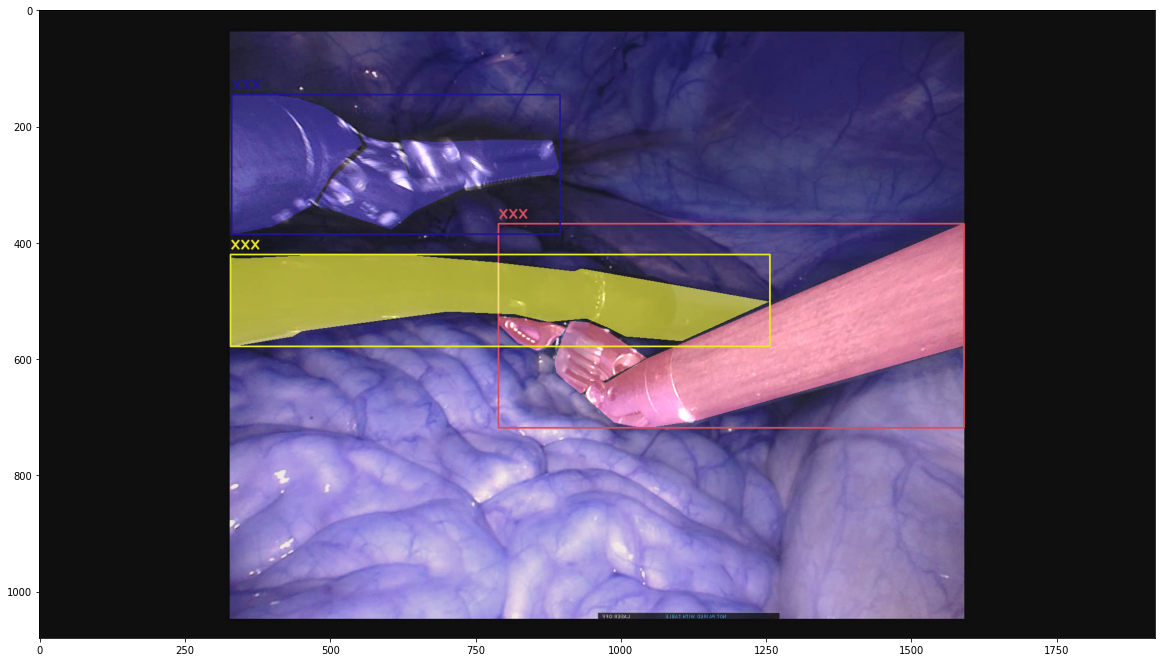

In [66]:
plt.figure(figsize = (20, 20))
plt.imshow(img)

# Second image

In [75]:
boxes_ = y[5]['boxes'].tolist()

In [76]:
boxes = [[(int(box[0]),int(box[1])), (int(box[2]),int(box[3]))] for box in boxes_]

In [77]:
boxes

[[(329, 331), (1030, 644)],
 [(573, 261), (1589, 1021)],
 [(1009, 352), (1590, 711)]]

In [78]:
labels = ['xxx'] * len(boxes)

In [79]:
img = np.moveaxis(x[5].numpy(), 0, -1)

In [80]:
img = draw_segmentation_map(img, y[5]['masks'], boxes, labels)

In [81]:
import matplotlib.pyplot as plt

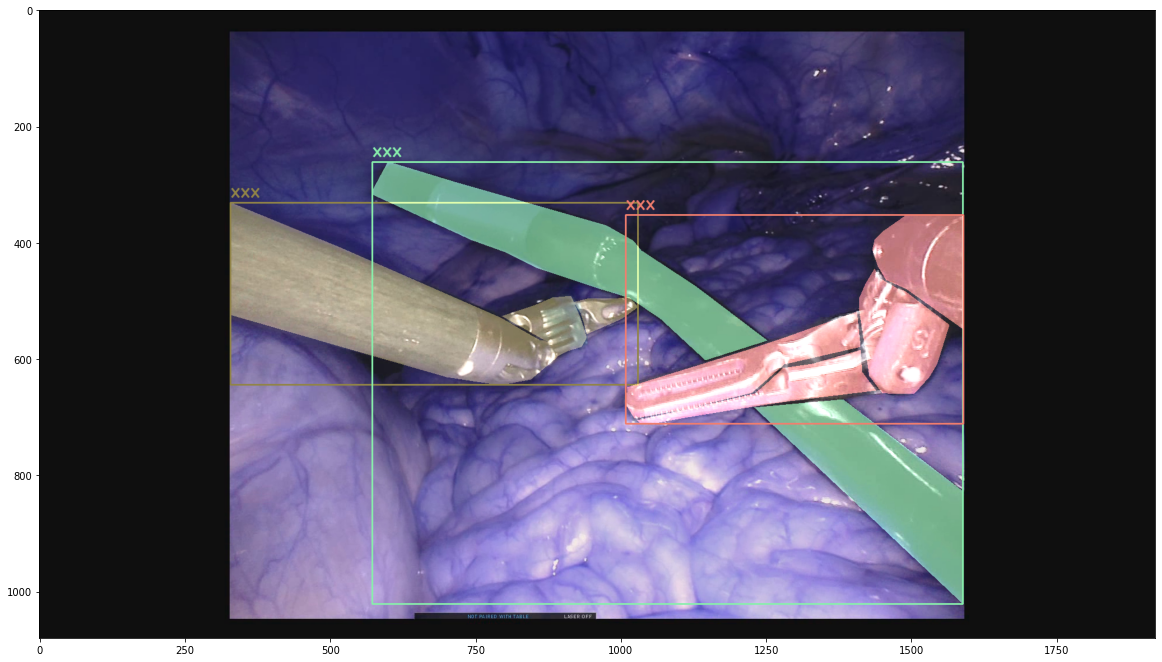

In [82]:
plt.figure(figsize = (20, 20))
plt.imshow(img)

# display model type

In [1]:
from models import models

In [7]:
import torchvision
import torch

In [3]:
heads =  {'bbox': 'fastrcnn', 'segm': 'maskrcnn'}

In [5]:
nn = models.get_model_instance(2, 256 , heads)

In [8]:
def _get_iou_types(model):
    model_without_ddp = model
    if isinstance(model, torch.nn.parallel.DistributedDataParallel):
        model_without_ddp = model.module
    iou_types = ["bbox"]
    if isinstance(model_without_ddp, torchvision.models.detection.MaskRCNN):
        iou_types.append("segm")
    if isinstance(model_without_ddp, torchvision.models.detection.KeypointRCNN):
        iou_types.append("keypoints")
    return iou_types

In [26]:
_get_iou_types(nn)

['bbox', 'segm']